In [1]:
data = r'C:\Users\Angger Hanggara\Downloads\BANGK!T\CAPSTONE PROJECT\MACHINE LEARNING\fish_dataset_2'

train_data = data + '/train'
val_data = data + '/val'

In [2]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_data, test_data = train_test_split(os.listdir(data), test_size=0.2, random_state=42)

# train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip= True,
    validation_split=0.15,
)

train_generator = datagen.flow_from_directory(
    train_data,
    target_size =(224,224),
    batch_size = 32,
    class_mode='categorical',
    subset='training',
    seed=42
)

val_generator = datagen.flow_from_directory(
    train_data,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation',
    seed=42
)

class_indices = train_generator.class_indices
print("class indices:", class_indices)


Found 4785 images belonging to 10 classes.
Found 839 images belonging to 10 classes.
class indices: {'Catfish': 0, 'Goby': 1, 'Gourami': 2, 'Mackerel': 3, 'Pangasius': 4, 'Sardine': 5, 'Shrimp': 6, 'Silver Barb': 7, 'Tilapia': 8, 'Tuna': 9}


In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.96):
            print("\nTarget telah dicapai, berhenti training!!!")
            self.model.stop_training= True
callbacks = myCallback()
history = model.fit(
    train_generator,
    epochs=300,
    steps_per_epoch=20,
    validation_data=val_generator,
    callbacks = callbacks
)


Epoch 1/300
20/20 [==============================] - 140s 6s/step - loss: 1.7485 - accuracy: 0.4172 - val_loss: 1.8315 - val_accuracy: 0.3790
Epoch 2/300
20/20 [==============================] - 74s 4s/step - loss: 1.6396 - accuracy: 0.4594 - val_loss: 1.7132 - val_accuracy: 0.4577
Epoch 3/300
20/20 [==============================] - 54s 3s/step - loss: 1.5902 - accuracy: 0.4560 - val_loss: 1.6524 - val_accuracy: 0.4541
Epoch 4/300
20/20 [==============================] - 54s 3s/step - loss: 1.5680 - accuracy: 0.4578 - val_loss: 1.6467 - val_accuracy: 0.4446
Epoch 5/300
20/20 [==============================] - 54s 3s/step - loss: 1.5651 - accuracy: 0.4812 - val_loss: 1.6110 - val_accuracy: 0.4887
Epoch 6/300
20/20 [==============================] - 55s 3s/step - loss: 1.4179 - accuracy: 0.5391 - val_loss: 1.6966 - val_accuracy: 0.4482
Epoch 7/300
20/20 [==============================] - 53s 3s/step - loss: 1.5040 - accuracy: 0.4812 - val_loss: 1.5875 - val_accuracy: 0.4827
Epoch 8/300


Epoch 59/300
20/20 [==============================] - 53s 3s/step - loss: 0.6867 - accuracy: 0.7812 - val_loss: 1.0059 - val_accuracy: 0.6830
Epoch 60/300
20/20 [==============================] - 53s 3s/step - loss: 0.6581 - accuracy: 0.7781 - val_loss: 1.0980 - val_accuracy: 0.6555
Epoch 61/300
20/20 [==============================] - 52s 3s/step - loss: 0.6906 - accuracy: 0.7812 - val_loss: 1.0065 - val_accuracy: 0.6794
Epoch 62/300
20/20 [==============================] - 52s 3s/step - loss: 0.6114 - accuracy: 0.7969 - val_loss: 1.1096 - val_accuracy: 0.6484
Epoch 63/300
20/20 [==============================] - 52s 3s/step - loss: 0.6015 - accuracy: 0.7922 - val_loss: 1.1261 - val_accuracy: 0.6460
Epoch 64/300
20/20 [==============================] - 52s 3s/step - loss: 0.7329 - accuracy: 0.7344 - val_loss: 1.0287 - val_accuracy: 0.6651
Epoch 65/300
20/20 [==============================] - 53s 3s/step - loss: 0.6826 - accuracy: 0.8031 - val_loss: 0.9842 - val_accuracy: 0.7020
Epoch 

20/20 [==============================] - 52s 3s/step - loss: 0.2796 - accuracy: 0.9016 - val_loss: 0.8650 - val_accuracy: 0.7592
Epoch 174/300
20/20 [==============================] - 53s 3s/step - loss: 0.2254 - accuracy: 0.9250 - val_loss: 0.8969 - val_accuracy: 0.7604
Epoch 175/300
20/20 [==============================] - 53s 3s/step - loss: 0.2884 - accuracy: 0.9047 - val_loss: 0.9906 - val_accuracy: 0.7271
Epoch 176/300
20/20 [==============================] - 52s 3s/step - loss: 0.3039 - accuracy: 0.9016 - val_loss: 0.8312 - val_accuracy: 0.7652
Epoch 177/300
20/20 [==============================] - 51s 3s/step - loss: 0.2905 - accuracy: 0.9094 - val_loss: 0.8843 - val_accuracy: 0.7449
Epoch 178/300
20/20 [==============================] - 53s 3s/step - loss: 0.2514 - accuracy: 0.9172 - val_loss: 1.0099 - val_accuracy: 0.7151
Epoch 179/300
20/20 [==============================] - 52s 3s/step - loss: 0.2972 - accuracy: 0.8922 - val_loss: 0.8958 - val_accuracy: 0.7569
Epoch 180/300

In [ ]:
test_generator = datagen.flow_from_directory(
    train_data,
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'categorical'
    
)

evaluation = model.evaluate(test_generator)
print("test accuracy: {:.2f}%".format(evaluation[1]*100))

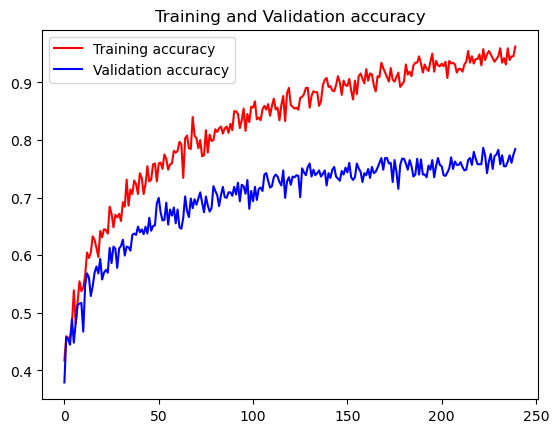

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [9]:
model.save("model.h5")

C:\Users\Angger Hanggara\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ANGGER~1\AppData\Local\Temp\tmp56f1g86d\assets


INFO:tensorflow:Assets written to: C:\Users\ANGGER~1\AppData\Local\Temp\tmp56f1g86d\assets


In [12]:
from keras.src.utils.image_utils import img_to_array
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

uploaded = r''

for fn in uploaded.keys():

  path = fn
  img = load_img(path, target_size=(300,300))
  x = img_to_array(img)
  x /=225
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictions = model.predict(images, batch_size = 10)

  print(predictions)
  print(fn)

  classes = np.argmax(predictions, axis=1)
  threshold = 0.3

  if predictions[0, classes[0]] > threshold:
    print(f"{fn} belongs to class {classes[0]}")
  else:
    print(f"{fn} does not belong to class {classes[0]}")

ModuleNotFoundError: No module named 'google.colab'